# GPU info

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Oct  9 10:20:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


# Installing Transformers

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 231 kB 15.2 MB/s 
     |████████████████████████████████| 270 kB 68.4 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 1.2 MB 58.3 MB/s 
     |████████████████████████████████| 3.3 MB 46.2 MB/s 
     |████████████████████████████████| 2.9 MB 76.4 MB/s 
     |████████████████████████████████| 1.7 MB 51.4 MB/s 
     |████████████████████████████████| 8.3 MB 50.0 MB/s 
     |████████████████████████████████| 895 kB 57.3 MB/s 
     |████████████████████████████████| 56 kB 6.7 MB/s 
     |████████████████████████████████| 636 kB 59.8 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
     |████████████████████████████████| 180 kB 71.8 MB/s 
     |████████████████████████████████| 139 kB 76.6 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 243 kB 67.9 MB/s 
     |████████████████████████████████| 125 kB 77.2 MB/s 
     |████████████████

# Setup

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorboardX
!wandb login

     |████████████████████████████████| 124 kB 13.1 MB/s 
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
lang = 'marathi'
seed = 40
data = '/content/drive/MyDrive/datasets/'
save = f'/content/drive/MyDrive/transformers/{lang}'

In [ ]:
#general
import string
import re
import warnings
warnings.filterwarnings("ignore")

#data processing
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import sklearn

#others
import wandb
from scipy.special import softmax
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support

#huggingface
from simpletransformers.classification import ClassificationModel

from scipy.special import softmax

# Dataset

In [ ]:
train = pd.read_csv(f'{data}/df_ma_train.csv')
test = pd.read_csv(f'{data}/df_ma_test.csv')
dev = pd.read_csv(f'{data}/df_ma_dev.csv')

In [ ]:
print(train.shape, test.shape, dev.shape)

(12114, 2) (2250, 2) (1500, 2)


In [ ]:
train.category = pd.Categorical(train.category)
train['category'] = train['category'].cat.codes
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)
train

,text,category
0,ज्येष्ठ पत्रकार अनंत दीक्षित यांच्या निधनाचे व...,0
1,सर्वोच्च न्यायालयाचे निर्देश डावलून पुणे पोलिस...,0
2,उद्धव ठाकरेंनी भाजपासोबत युती करून शिवसैनिकांच...,0
3,आपला समाज खूप मोठा आहे त्यात अनेक घटक अंतर्भूत...,2
4,बलात्काराचा बदला बलात्काराने घेतला पाहिजे हे म...,0
...,...,...
12109,त्याचबरोबर काजू व्यावसायिकांची मागील कालावधीती...,2
12110,सरकारने कर्जमाफी योजना लागू करुन सुमारे वर्षां...,0
12111,लोकशाहीत मतदारच खऱ्या अर्थाने सत्ताधारी असतोत्...,0
12112,छत्रपती शिवाजी महाराज यांच्या नावे शिवसेनेची स...,0


In [ ]:
test.category = pd.Categorical(test.category)
test['category'] = test['category'].cat.codes
test.dropna(inplace=True)
test.reset_index(drop=True, inplace=True)
test

,text,category
0,चा फक्त नारा देऊन उपयोग नाही महिला अत्याचाराच्...,2
1,पेट्रोल आणि डिझेलवर एक रूपया अधिभार लावल्याने ...,0
2,लूट झूट का राज भागावो रोजगार और विकास लावो हा ...,2
3,महाराष्ट्र विकास आघाडी सरकारच्या मंत्रिमंडळ वि...,2
4,पिंपरीत अ‍ॅथलेटिक्स आणि विविध क्षेत्रांतल्या ख...,2
...,...,...
2245,जनसामान्यांचे प्रतिनिधी संविधानाचे जाणकार वंचि...,2
2246,अक्षय्य तृतियेच्या हार्दिक शुभेच्छा ्षयतृतीया,2
2247,अभाव दिसतो कोरोनाने दिलेल्या संधीचा उपोयोग करू...,1
2248,मोदींच्या कामाला जनतेचा कौल ‘सकाळ‘ मध्ये प्रका...,2


In [ ]:
dev.category = pd.Categorical(dev.category)
dev['category'] = dev['category'].cat.codes
dev.dropna(inplace=True)
dev.reset_index(drop=True, inplace=True)
dev

,text,category
0,कोरोना काळात आपले पंतप्रधान मा नरेंद्र मोदीजी ...,2
1,पुणे येथे राष्ट्रसेवा दल अभ्यासिका विभाग यांच्...,2
2,पुणे येथील क्रांती ज्योती या कार्यक्रमात जेष्ठ...,1
3,आद्यक्रांतिकारक उमाजीराजे नाईक यांना जयंतीनिमि...,2
4,महाराष्ट्राचे मुख्यमंत्री म्हणून शपथ घेतल्याबद...,2
...,...,...
1495,पोलिसभरती प्रक्रिया जुन्या निकषांनुसार व्हावीय...,2
1496,हा निधी उद्ध्वस्त झालेल्या कुटुंबांमधील मुलांच...,2
1497,विकासाची फक्त घोषणाबाजी व जाहिरातबाजी करून राज...,1
1498,आज विधानसभेत राष्ट्रीय जनगणनेमध्ये ओबीसींची इत...,1


In [ ]:
print(train.shape, test.shape, dev.shape)

(12114, 2) (2250, 2) (1500, 2)


In [ ]:
print(train['category'].value_counts())
print(test['category'].value_counts())
print(dev['category'].value_counts())

2    4038
1    4038
0    4038
Name: category, dtype: int64
1    750
2    750
0    750
Name: category, dtype: int64
2    500
1    500
0    500
Name: category, dtype: int64


# Models

## Indic-BERT

In [ ]:
model = ClassificationModel('albert', 'ai4bharat/indic-bert', num_labels=3, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'logging_steps': 1,
    'no_save': True,
    'no_cache': True,
    'save_steps': -1,
    'manual_seed': seed,
    'evaluate_during_training_steps': 1,
    'evaluate_during_training_verbose': True,
    'save_eval_checkpoints': False,
    'num_train_epochs': 25,
    'wandb_project': 'server',
    'wandb_kwargs': {
        'name': 'Indic-BERT (Marathi)'
    }
})

model.train_model(train, eval_df=dev)

Downloading:   0%|          | 0.00/507 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129M [00:00<?, ?B/s]

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertForSequenceClassification: ['predictions.dense.bias', 'predictions.bias', 'predictions.decoder.weight', 'predictions.dense.weight', 'predictions.decoder.bias', 'sop_classifier.classifier.weight', 'predictions.LayerNorm.bias', 'sop_classifier.classifier.bias', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indi

Downloading:   0%|          | 0.00/5.38M [00:00<?, ?B/s]

  0%|          | 0/12114 [00:00<?, ?it/s]

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

wandb: Currently logged in as: fl_sentiment (use `wandb login --relogin` to force relogin)


Running Epoch 0 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 1 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 2 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 3 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 4 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 5 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 6 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 7 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 8 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 9 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 10 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 11 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 12 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 13 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 14 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 15 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 16 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 17 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 18 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 19 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 20 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 21 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 22 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 23 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 24 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

(37875, 0.13564910293490973)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, acc=sklearn.metrics.accuracy_score)
result

  0%|          | 0/2250 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/282 [00:00<?, ?it/s]

Training loss,█▅▆▆▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▄▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.0001
global_step,37875
lr,0.0


{'mcc': 0.7529123234738615,
 'acc': 0.8351111111111111,
 'eval_loss': 1.6113176010813273}

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, acc=confusion_matrix)
result

  0%|          | 0/2250 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/282 [00:00<?, ?it/s]

{'mcc': 0.7529123234738615,
 'acc': array([[672,  47,  31],
        [ 69, 600,  81],
        [ 44,  99, 607]]),
 'eval_loss': 1.6113176010813273}

In [ ]:
roc_auc_macro = sklearn.metrics.roc_auc_score(np.array(test["category"].values.tolist()),softmax(model_outputs, axis=1), multi_class='ovo')
roc_auc_macro

0.9295482962962963

In [ ]:
roc_auc_wt = sklearn.metrics.roc_auc_score(np.array(test["category"].values.tolist()),softmax(model_outputs, axis=1), average='weighted', multi_class='ovo')
roc_auc_wt

0.9295482962962963

In [ ]:
scores_macro = sklearn.metrics.precision_recall_fscore_support(np.array(test["category"].values.tolist()),np.argmax(softmax(model_outputs, axis=1), axis=1), average='macro')
scores_macro

(0.8348561980752458, 0.8351111111111112, 0.8347071985113382, None)

In [ ]:
scores_wt = sklearn.metrics.precision_recall_fscore_support(np.array(test["category"].values.tolist()),np.argmax(softmax(model_outputs, axis=1), axis=1), average='weighted')
scores_wt

(0.8348561980752458, 0.8351111111111111, 0.8347071985113382, None)

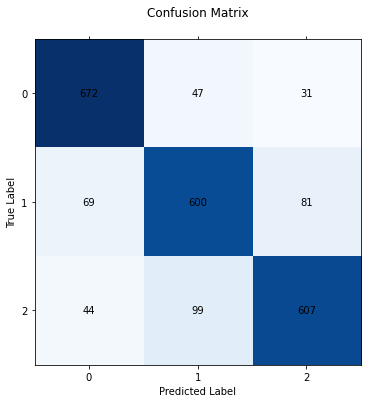

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

intersection_matrix = result['acc']

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(3):
    for j in range(3):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.xticks(range(0, 3))
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(np.arange(0, 3, step=1))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig(f'{save}/indic_bert/imbalanced', dpi=100)
plt.show()

## m-BERT

In [ ]:
model = ClassificationModel('bert', 'bert-base-multilingual-uncased', num_labels=3, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'logging_steps': 1,
    'no_save': True,
    'no_cache': True,
    'save_steps': -1,
    'manual_seed': seed,
    'evaluate_during_training_steps': 1,
    'evaluate_during_training_verbose': True,
    'save_eval_checkpoints': False,
    'num_train_epochs': 25,
    'wandb_project': 'server',
    'wandb_kwargs': {
        'name': 'm-BERT (Marathi)'
    }
})

model.train_model(train, eval_df=dev)

Downloading:   0%|          | 0.00/641M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

  0%|          | 0/12114 [00:00<?, ?it/s]

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

Running Epoch 0 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 1 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 2 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 3 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 4 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 5 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 6 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 7 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 8 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 9 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 10 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 11 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 12 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 13 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 14 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 15 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 16 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 17 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 18 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 19 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 20 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 21 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 22 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 23 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 24 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

(37875, 0.2793847490320898)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, acc=sklearn.metrics.accuracy_score)
result

  0%|          | 0/2250 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/282 [00:00<?, ?it/s]

Training loss,▇▇▄▃▅▄▁▃▄▃█▆▁▂▁▁▁▁▄▂▁▁▁▃▁▁▁▁▁▁▂▁▁▁▁▄▁▁▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▄▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.01138
global_step,37875
lr,0.0


{'mcc': 0.5366711190677534,
 'acc': 0.6911111111111111,
 'eval_loss': 2.7642618243364576}

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, acc=confusion_matrix)
result

  0%|          | 0/2250 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/282 [00:00<?, ?it/s]

{'mcc': 0.5366711190677534,
 'acc': array([[552,  84, 114],
        [105, 505, 140],
        [ 87, 165, 498]]),
 'eval_loss': 2.7642618243364576}

In [ ]:
roc_auc_macro = sklearn.metrics.roc_auc_score(np.array(test["category"].values.tolist()),softmax(model_outputs, axis=1), multi_class='ovo')
roc_auc_macro

0.8334026666666666

In [ ]:
roc_auc_wt = sklearn.metrics.roc_auc_score(np.array(test["category"].values.tolist()),softmax(model_outputs, axis=1), average='weighted', multi_class='ovo')
roc_auc_wt

0.8334026666666665

In [ ]:
scores_macro = sklearn.metrics.precision_recall_fscore_support(np.array(test["category"].values.tolist()),np.argmax(softmax(model_outputs, axis=1), axis=1), average='macro')
scores_macro

(0.6913102665445695, 0.6911111111111111, 0.6912047406746478, None)

In [ ]:
scores_wt = sklearn.metrics.precision_recall_fscore_support(np.array(test["category"].values.tolist()),np.argmax(softmax(model_outputs, axis=1), axis=1), average='weighted')
scores_wt

(0.6913102665445694, 0.6911111111111111, 0.6912047406746477, None)

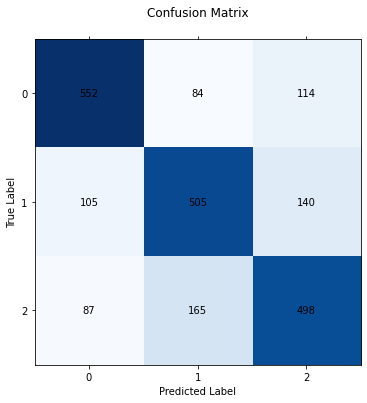

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

intersection_matrix = result['acc']

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(3):
    for j in range(3):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.xticks(range(0, 3))
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(np.arange(0, 3, step=1))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig(f'{save}/m_bert/imbalanced', dpi=100)
plt.show()

## XML-R

In [ ]:
model = ClassificationModel('roberta', 'xlm-roberta-base', num_labels=3, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'logging_steps': 1,
    'no_save': True,
    'no_cache': True,
    'save_steps': -1,
    'manual_seed': seed,
    'evaluate_during_training_steps': 1,
    'evaluate_during_training_verbose': True,
    'save_eval_checkpoints': False,
    'num_train_epochs': 25,
    'wandb_project': 'server',
    'wandb_kwargs': {
        'name': 'XML-R(Marathi)'
    }
})

model.train_model(train, eval_df=dev)

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights o

  0%|          | 0/12114 [00:00<?, ?it/s]

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

Running Epoch 0 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 1 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 2 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 3 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 4 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 5 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 6 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 7 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 8 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 9 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 10 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 11 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 12 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 13 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 14 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 15 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 16 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 17 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 18 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 19 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 20 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 21 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 22 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 23 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

Running Epoch 24 of 25:   0%|          | 0/1515 [00:00<?, ?it/s]

(37875, 0.20762617028034952)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, acc=sklearn.metrics.accuracy_score)
result

  0%|          | 0/2250 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/282 [00:00<?, ?it/s]

Training loss,▅▇█▃▃▁▁▄▂▁▁▁▆▅▁▁▁▁▂▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▄▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,5e-05
global_step,37875
lr,0.0


{'mcc': 0.7454879690982223,
 'acc': 0.8302222222222222,
 'eval_loss': 1.648056536543031}

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, acc=confusion_matrix)
result

  0%|          | 0/2250 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/282 [00:00<?, ?it/s]

{'mcc': 0.7454879690982223,
 'acc': array([[667,  44,  39],
        [ 70, 580, 100],
        [ 33,  96, 621]]),
 'eval_loss': 1.648056536543031}

In [ ]:
roc_auc_wt = sklearn.metrics.roc_auc_score(np.array(test["category"].values.tolist()),softmax(model_outputs, axis=1), average='weighted', multi_class='ovo')
roc_auc_wt

0.9252666666666667

In [ ]:
roc_auc_wt = sklearn.metrics.roc_auc_score(np.array(test["category"].values.tolist()),softmax(model_outputs, axis=1), average='weighted', multi_class='ovo')
roc_auc_wt

0.9252666666666667

In [ ]:
scores_macro = sklearn.metrics.precision_recall_fscore_support(np.array(test["category"].values.tolist()),np.argmax(softmax(model_outputs, axis=1), axis=1), average='macro')
scores_macro

(0.8296315283157388, 0.8302222222222221, 0.8297545938324209, None)

In [ ]:
scores_wt = sklearn.metrics.precision_recall_fscore_support(np.array(test["category"].values.tolist()),np.argmax(softmax(model_outputs, axis=1), axis=1), average='weighted')
scores_wt

(0.8296315283157387, 0.8302222222222222, 0.8297545938324209, None)

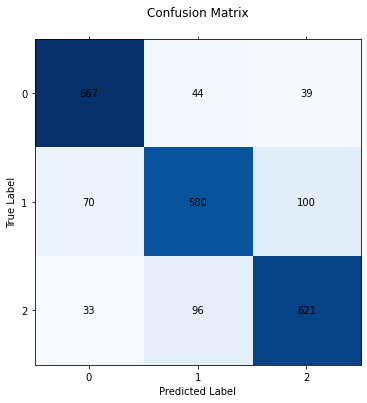

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

intersection_matrix = result['acc']

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(3):
    for j in range(3):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.xticks(range(0, 3))
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(np.arange(0, 3, step=1))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig(f'{save}/xlmr/imbalanced', dpi=100)
plt.show()

# Results